### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

⚠️ File not found. Using sample data...


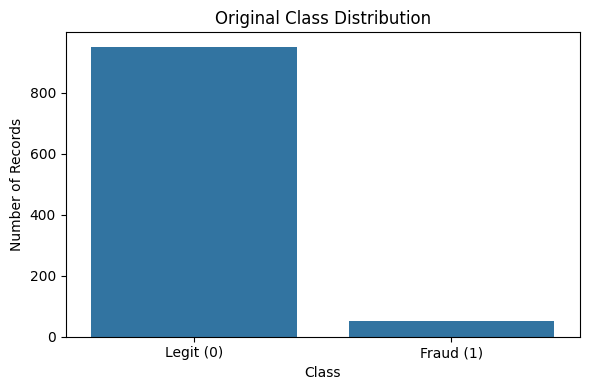

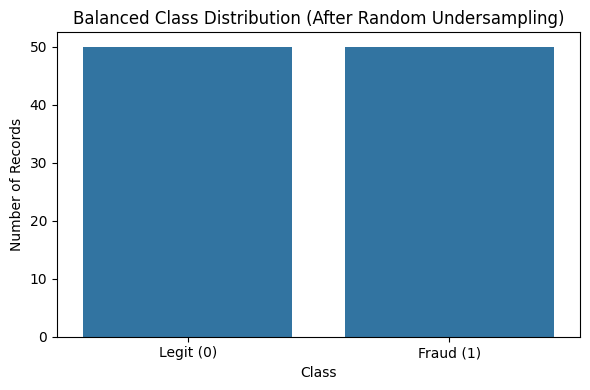

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import numpy as np  # ✅ FIXED: Import numpy for sample generation

# Step 1: Load the dataset (or create sample data if not found)
try:
    df = pd.read_csv("creditcard.csv")
    print("✅ Loaded 'creditcard.csv'")
except FileNotFoundError:
    print("⚠️ File not found. Using sample data...")
    df_legit = pd.DataFrame({'Amount': abs(np.random.randn(950)), 'Class': 0})
    df_fraud = pd.DataFrame({'Amount': abs(np.random.randn(50)), 'Class': 1})
    df = pd.concat([df_legit, df_fraud], ignore_index=True)

# Step 2: Visualize original class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Original Class Distribution")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

# Step 3: Handle imbalance using random undersampling
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Step 4: Visualize balanced class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_balanced)
plt.title("Balanced Class Distribution (After Random Undersampling)")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()